In [1]:
#This url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = requests.get(url).text

Create a soup object


In [4]:
soup = BeautifulSoup(data , 'html.parser')
#soup

Scrape the `Language name` and `annual average salary`.


In [5]:
table = soup.find('table')  # in html table is represented by the tag <table
table

<table>
<tbody>
<tr>
<td>No.</td>
<td>Language</td>
<td>Created By</td>
<td>Average Annual Salary</td>
<td>Learning Difficulty</td>
</tr>
<tr>
<td>1</td>
<td>Python</td>
<td>Guido van Rossum</td>
<td>$114,383</td>
<td>Easy</td>
</tr>
<tr>
<td>2</td>
<td>Java</td>
<td>James Gosling</td>
<td>$101,013</td>
<td>Easy</td>
</tr>
<tr>
<td>3</td>
<td>R</td>
<td>Robert Gentleman, Ross Ihaka</td>
<td>$92,037</td>
<td>Hard</td>
</tr>
<tr>
<td>4</td>
<td>Javascript</td>
<td>Netscape</td>
<td>$110,981</td>
<td>Easy</td>
</tr>
<tr>
<td>5</td>
<td>Swift</td>
<td>Apple</td>
<td>$130,801</td>
<td>Easy</td>
</tr>
<tr>
<td>6</td>
<td>C++</td>
<td>Bjarne Stroustrup</td>
<td>$113,865</td>
<td>Hard</td>
</tr>
<tr>
<td>7</td>
<td>C#</td>
<td>Microsoft</td>
<td>$88,726</td>
<td>Hard</td>
</tr>
<tr>
<td>8</td>
<td>PHP</td>
<td>Rasmus Lerdorf</td>
<td>$84,727</td>
<td>Easy</td>
</tr>
<tr>
<td>9</td>
<td>SQL</td>
<td>Donald D. Chamberlin, Raymond F. Boyce.</td>
<td>$84,793</td>
<td>Easy</td>
</tr>
<tr>
<td>10</t

In [6]:
df = pd.DataFrame(columns=["Language name","annual average salary($)"])
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language = cols[1].text
    salary = cols[3].text
    print("{}--->{}".format(language,salary))
    df = df.append({"Language name":language, "annual average salary($)":salary}, ignore_index=True)

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


In [7]:
df

,Language name,annual average salary($)
0,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"


In [8]:
df.drop(0, axis=0, inplace = True)

In [9]:
df

,Language name,annual average salary($)
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"
10,Go,"$94,082"


In [10]:
#df.info()

In [11]:
df[['annual average salary($)']] = df[['annual average salary($)']].replace('\$|,', '', regex=True)

In [12]:
df.sort_values('annual average salary($)', ascending = True)

,Language name,annual average salary($)
2,Java,101013
4,Javascript,110981
6,C++,113865
1,Python,114383
5,Swift,130801
8,PHP,84727
9,SQL,84793
7,C#,88726
3,R,92037
10,Go,94082


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Language name             10 non-null     object
 1   annual average salary($)  10 non-null     object
dtypes: object(2)
memory usage: 240.0+ bytes


In [14]:
df['annual average salary($)'] = df['annual average salary($)'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Language name             10 non-null     object
 1   annual average salary($)  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [22]:
df = df.sort_values('annual average salary($)', ascending = True)

In [23]:
df

,Language name,annual average salary($)
8,PHP,84727
9,SQL,84793
7,C#,88726
3,R,92037
10,Go,94082
2,Java,101013
4,Javascript,110981
6,C++,113865
1,Python,114383
5,Swift,130801


In [26]:
df.set_index('Language name', inplace = True)

In [27]:
df

,annual average salary($)
Language name,
PHP,84727
SQL,84793
C#,88726
R,92037
Go,94082
Java,101013
Javascript,110981
C++,113865
Python,114383


In [33]:
df_series = df['annual average salary($)']

In [35]:
df_series

Language name
PHP            84727
SQL            84793
C#             88726
R              92037
Go             94082
Java          101013
Javascript    110981
C++           113865
Python        114383
Swift         130801
Name: annual average salary($), dtype: int64

<AxesSubplot:xlabel='Language name'>

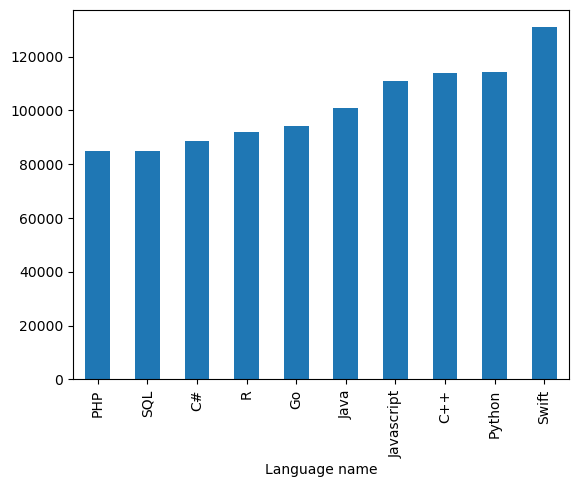

In [36]:
df_series.plot(kind = 'bar')

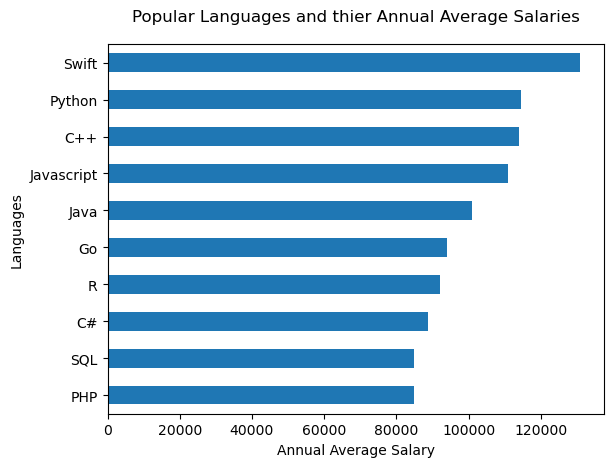

In [37]:
df_series.plot(kind = 'barh', legend = False)
plt.ylabel('Languages')
plt.xlabel('Annual Average Salary')
plt.title('Popular Languages and thier Annual Average Salaries', y = 1.04)

plt.show()

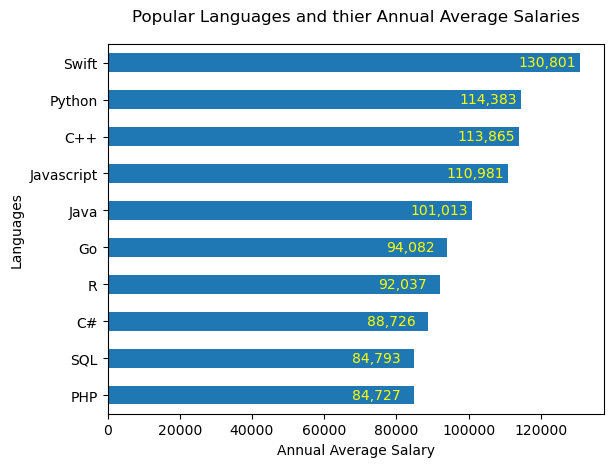

In [38]:

df_series.plot(kind = 'barh', legend = False)
plt.ylabel('Languages')
plt.xlabel('Annual Average Salary')
plt.title('Popular Languages and thier Annual Average Salaries', y = 1.04)

for index, value in enumerate(df_series): 
    label = format(int(value), ',') # format int with commas
    #place text at the end of bar (subtracting 17000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 17000, index- 0.10 ), color='yellow')


plt.show()


In [41]:
for index, value in enumerate(df_series):
    #label = format(float(value), ',') # format int with commas
    print(value, index)

84727 0
84793 1
88726 2
92037 3
94082 4
101013 5
110981 6
113865 7
114383 8
130801 9


Save the scrapped data into a file named *popular-languages.csv*

In [ ]:
df_series.to_csv('popular-languages.csv')

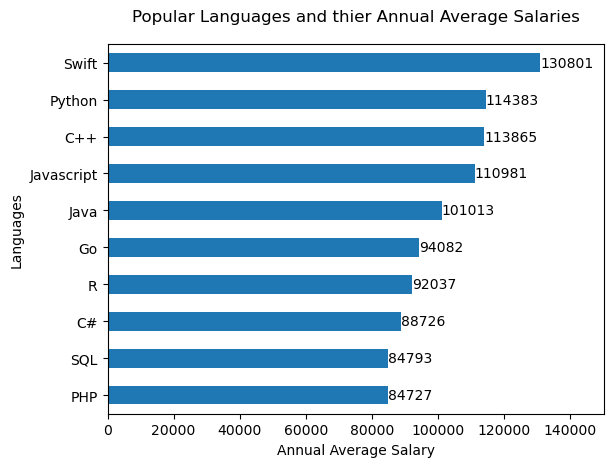

In [42]:
#This also worked nicely 
ax = df.plot(kind = 'barh', legend = False)
plt.ylabel('Languages')
plt.xlabel('Annual Average Salary')
plt.bar_label(ax.containers[0], label_type='edge')
plt.xlim(0,150000)
plt.title('Popular Languages and thier Annual Average Salaries', y = 1.04)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
